# 第８回　Pythonで統計学（基本統計量）

今回の内容は次のとおりです。  
- 平均値、中央値、分散、標準偏差といった基本統計量をPythonで求める方法  
- ヒストグラム、箱ひげ図の書き方

## 基本統計量の求め方

### パッケージのインポート

データを配列（行列）に格納するためのパッケージであるnumpyとあわせて、科学技術計算をおこなうためのパッケージであるscipyもインポートします。

In [1]:
import numpy as np
import scipy as sp

### １変量データの管理

身長だけ、とか、体重だけ、とかのように、１種類の変数の値だけが含まれるデータを１変量データといいます。データは、numpyのアレイ(array)すなわち配列に格納します。例えば、sample_dataという変数に、１０個体からの何かの値を格納しましょう。

In [2]:
sample_data = np.array([2,4,3,4,4,3,6,5,5,4])
sample_data

array([2, 4, 3, 4, 4, 3, 6, 5, 5, 4])

前回までにも、numpyのアレイ（配列）は行列を表すために使ってきました。この配列は、１行の行列でもあります。

### データを記述する諸指標（１）

サンプルのサイズ、すなわち、データの件数を数えるには、Python標準のlen()関数を用います。

In [3]:
len(sample_data)

10

合計を計算するには、Python標準のsum()関数を利用します。

In [4]:
sum(sample_data)

40

平均値の計算にはnumpy（またはscipy）のmean()関数を利用します。

In [5]:
np.mean(sample_data)

4.0

中央値の計算には、numpy（またはscipy）のmedian()関数を利用します。

In [6]:
np.median(sample_data)

4.0

### データを記述する諸指標（２）：分散と標準偏差

#### 分散（標本分散）

**分散（標本分散）**を計算しましょう。分散とは、「データが平均値からどれくらい離れてばらついているか」を表す指標です。  
それぞれの値と平均との差（偏差）を２乗したもの（偏差平方）の平均です。
numpy（またはscipy）のvar()関数を利用します。

In [7]:
np.var(sample_data)

1.2

var()関数を使わずに、上に述べた分散（標本分散）の定義に従って計算すると次のようになります。

In [12]:
sample_size = len(sample_data) #データの個数
sample_sum = sum(sample_data) #データの総和
sample_mean = sample_sum/sample_size #データの平均
sum_square_deviation = sum((sample_data - sample_mean)**2) #それぞれの値の平均との差の２乗の和(偏差平方和)
# 上の行の説明：
# numpyのアレイ（配列）のすべての要素について、平均との差を計算して、それを２乗したものの、総和を求める。
sample_var = sum_square_deviation/sample_size #標本分散
print(sample_var)

1.2


numpy.array()でデータを定義しているので、「それぞれの値の平均との差の２乗の和」のプログラムが楽に書けました。  
「配列のそれぞれの要素からスカラーを引き算して２乗する」という命令を、配列の「ブロードキャスト」機能を利用して１行で書けるからです。  
一方、np.arrayではなくPython標準のリストでデータを定義すると、データをイテレータとして（つまり個々のデータに対して）、平均値との差の２乗を計算することが必要になります。  
Python標準のリストでデータを定義すると、上のプログラムは例えば下のように書く必要があるでしょう。

In [10]:
sample_data_tmp = [2,4,3,4,4,3,6,5,5,4]
sample_size_tmp = len(sample_data_tmp)
sample_sum_tmp = sum(sample_data_tmp)
sample_mean_tmp = sample_sum_tmp/sample_size_tmp
sample_square_deviation_tmp = [(i - sample_mean_tmp)**2 for i in sample_data_tmp ] # ここに注目
sum_square_deviation_tmp = sum(sample_square_deviation_tmp)
sample_var_tmp = sum_square_deviation_tmp/sample_size_tmp
print(sample_var_tmp)

1.2


ところで、有名なので式変形は省略しますが、標本値の「平均からのずれの２乗の和」（**偏差平方和**, deviation sum of squares）は、標本値の「２乗の和」（平方和, sum of squares）から、「平均値の２乗ｘ標本数」を引いた値に等しくなります。   
つまり、（標本の）分散は、「（標本値の）２乗の平均　－　平均の２乗」です。計算してみましょう。

In [11]:
sum_sq_tmp = sum([i**2 for i in sample_data_tmp ])
sum_sq_tmp/sample_size_tmp  - sample_mean_tmp**2

1.1999999999999993

ここでは説明を省略しますが、次の計算の誤差が、値の違いの原因です。このように、割り算による誤差は容易に生じますので、場合によっては注意が必要です。

In [44]:
172/10 - 16

1.1999999999999993

#### 標準偏差

次に進みます  
分散の平方根が標準偏差（standard deviation）です。上で最初に計算した分散に対して、numpyのsqrt()関数で計算してみましょう。

In [32]:
np.sqrt(sample_var)

1.0954451150103321

標準偏差は、データから直接、numpyのstd()関数で計算できます。

In [33]:
np.std(sample_data)

1.0954451150103321

#### 補足：不偏分散

さて、分散（標本分散）と書いたのは、分散にはもう１種類「**不偏分散**」（unbiased variance）と呼ばれるものがあるからです。  
データの統計的指標を求める作業の趣旨として、２つあります。ひとつは、「**記述統計**」すなわちデータの記述と要約です。もうひとつは、「**推測統計**」すなわちデータそのものというよりは、データのもとになっている集団の性質を推測することです。  

「不偏分散」は、後者のほうに属する指標です。つまり、母集団全体の分散を知りたくて、データから「分散」を求めている場合です。   
母集団からn個の標本を取って標本の平均を求めるとします。各々の標本の値は、母集団の期待値と分散に従って現れるものとします。  
第１０回で改めて説明しますが、n個の標本において、(標本の値－標本平均)の２乗の総和（偏差平方和）は、**母集団の分散の$n$倍ではなくて$(n-1)$倍になります。**  
ですから、標本から母集団の分散を推定するためには、(標本の値－標本平均)の２乗の総和（偏差平方和）を(標本の数-1)で割ります。これを「不偏分散」といいます。
sample_dataの不偏分散を求めましょう。

In [13]:
sample_uvar = sum_square_deviation/(sample_size - 1)
sample_uvar

1.3333333333333333

標本の数-1を**自由度**(degree of freedom）といいます。numpyのvar()関数で**オプションddofの値**を、標本の数 - 自由度、すなわち、この場合だと**ddof=1と設定する**と、不偏分散が求められます。デフォルト（ddof=0）と比べて値が大きいのがわかるでしょう。

In [14]:
np.var(sample_data, ddof=1)

1.3333333333333333

#### 補足（２）：標準誤差

不偏分散を用いて、標本の**標準誤差**を求めることができます。説明は省略しますが、**標本から推定される平均値の分散は、標本の大きさに反比例します**。従って、**推定される平均の標準偏差は、標本の大きさの平方根に反比例します**。これを反映する指標が**標準誤差**です。  
標準誤差とは、**母集団の標準偏差**（**不偏分散の平方根**）を**標本数の平方根で割ったもの**です。標準誤差は、標本から推定される母集団の平均値の、ずれの可能性の大きさ（平均値の分散の平方根すなわち標準偏差）をあらわし、標本数が多くなるほど分母が大きくなりますから、ゼロに近づきます。   
では、まず、母集団の標準偏差を定義-不偏分散の平方根-に従って求めましょう

In [52]:
np.sqrt(np.var(sample_data,ddof=1))

1.1547005383792515

母集団の標準偏差はnumpyのstd()においてオプションddof=1で求められます。デフォルト（ddof=0）と値を比べると大きくなっているのがわかります。

In [48]:
np.std(sample_data, ddof=1)

1.1547005383792515

ここから標準誤差を求めると次のようになります。

In [53]:
np.std(sample_data, ddof=1)/np.sqrt(len(sample_data))

0.3651483716701107

なお、scipy.stats.sem()関数で一発で求められます。

In [2]:
import numpy as np
from scipy.stats import stats
sample_data = np.array([2,4,3,4,4,3,6,5,5,4])
stats.sem(sample_data,ddof=1)

0.3651483716701107

### データを記述する諸指標（３）：四分位点など

後述します箱ひげ図にも関係してきますが、データの50%パーセンタイル、つまり、最下位から50%にあたるデータはどれでしょうか。

In [54]:
from scipy import stats

In [58]:
sample_data_2 = [1,2,3,4,5,6,7,8,9]
stats.scoreatpercentile(sample_data_2,50)

5.0

これはすなわち中央値（メジアン）のことです。

In [59]:
np.median(sample_data_2)

5.0

同様にして、50%パーセンタイル点のさらに50%パーセンタイル点つまり25パーセンタイル点（第１四分位点）は3になります。確認しましょう。

In [61]:
stats.scoreatpercentile(sample_data_2,25)

3.0

### 練習問題（１）

次の表は、２回行った試験の点数です。このデータについて次の問いに答えてください。

なお、「**標準化得点**」とは、平均と標準偏差を利用して、各観測値が平均からどの程度離れているかを測る指標で、次のように定義されます。  
$$標準化得点 = \frac{個々の観測値 - 平均}{標準偏差} = \frac{x_i - \bar{x}}{s}$$  
ただし、$i = 1, 2, ..., n$で、$s^2$は分散（標本分散）です。

|学生|１回目（点）|２回目（点)|
|----|------|------|
|A|30|45|
|B|30|60|
|C|40|50|
|D|40|65|
|E|50|70|
|F|50|50|
|G|60|55|
|H|60|60|
|I|70|70|
|J|70|75|

問１　１回目の試験と２回目の試験の平均, 標準偏差（分散はデータの大きさ$n$で割る）を求めましょう

In [1]:
import numpy as np
import scipy as sp
# 1回目, 2回目の試験の点数を
# np.array([点数11, 点数12, ..., 点数1n ], [点数21, 点数2, ..., 点数2n])とします。
test_scores = np.array([[30, 30, 40, 40, 50, 50, 60, 60, 70, 70],
                       [45, 60, 50, 65, 70, 50, 55, 60, 70, 75]])
#np.shape(test_scores) # 行列の形を確認
# 1回目の試験の平均: mu_1, 2回目の試験の平均: mu_2とします。
mu_1 = np.mean(test_scores[0])
mu_2 = np.mean(test_scores[1])
print("1回目の試験の平均:",mu_1)
print("2回目の試験の平均:",mu_2)
#１回目の試験の標準偏差: d_1, 2回目の試験の標準偏差：d_2とします
d_1 = np.std(test_scores[0])
d_2 = np.std(test_scores[1])
print("1回目の試験の標準偏差:",d_1)
print("2回目の試験の標準偏差:",d_2)

1回目の試験の平均: 50.0
2回目の試験の平均: 60.0
1回目の試験の標準偏差: 14.142135623730951
2回目の試験の標準偏差: 9.486832980505138


問２　Cさんの１回目の試験と２回目の試験の標準化得点を求めましょう。

In [2]:
# mean_1: 1回目の平均点
# mean_2: ２回目の平均点
# st_dev_1: １回目の（標本）標準偏差
# st_dev_2: ２回目の（標本）標準偏差
mean_1 = np.mean(test_scores[0])
mean_2 = np.mean(test_scores[1])
st_dev_1 = np.sqrt(np.var(test_scores[0]))
st_dev_2 = np.sqrt(np.var(test_scores[1]))
#Cさんの１回目の点
score_C_1 = test_scores[0][2]
#Cさんの２回目の点
score_C_2 = test_scores[1][2]
#Cさんの1回目の標準化得点
z_C_1 = (score_C_1 - mean_1)/st_dev_1
#Cさんの2回目の標準化得点
z_C_2 = (score_C_2 - mean_2)/st_dev_2
#結果出力
print("Cさんの1回目の標準化得点:",z_C_1)
print("Cさんの2回目の標準化得点:",z_C_2)

Cさんの1回目の標準化得点: -0.7071067811865475
Cさんの2回目の標準化得点: -1.0540925533894598


補足：標準化得点を次のように計算したものが、「偏差値」です。
$$偏差値 = 10\times \frac{x_i - \bar{x}}{s} + 50 $$  
ただし、$i = 1, 2, ..., n$で、$s^2$は分散（標本分散）です。

## ヒストグラムと箱ひげ図

### 用いるデータについて

今回用いるデータは、2018年12月における、東京、名古屋、大阪、広島、福岡の、日別の平均気温です。２０１９年１１月に実施された統計検定２級の問題がこれを扱っていました。  
気象庁の「過去の気象データ検索」から取得しました、ファイル名は「temperature_1812.csv」です。  
このファイルはJupyter Notebookの画面で、ノートブックと同様に一覧の中に見えます。UTF-8でエンコーディングしてあるので、それをダブルクリックすると、内容を見ることができます。  
都市ごとに５列のデータがあります。それぞれの列は、３１行（つまり１日から３１日までそれぞれの日）の平均気温データを収めています。  

### データの読み込み

ファイルを作成したときの文字コードに適した文字コードオプションをつけて読み込みます。

In [3]:
import numpy as np
temp_data = np.genfromtxt('temperature_1812.csv', delimiter=',', skip_header=1,encoding="utf-8_sig")
# 文字コードに注意。

このデータが、31行5列の行列であることを確かめましょう。

In [4]:
temp_data.shape

(31, 5)

各列の最大値、最小値を求めましょう。度数分布表やヒストグラムの区間を決めるときに使います。

In [5]:
#東京, 名古屋, 大阪, 広島, 福岡の順に最大値・最小値を出力する
for i in range(0,temp_data.shape[1]):
    print([max(temp_data[:,i]),min(temp_data[:,i])])

[17.7, 3.3]
[15.7, 1.5]
[19.1, 4.1]
[16.8, 3.1]
[19.7, 3.8]


それでは、どの都市のデータを扱っているか忘れないために、各列を都市を名前とする変数で代表させましょう。1列め、２列め, ３列め, ...の添字は0, 1, 2, ...であることに気をつけます。

In [6]:
tokyo = temp_data[:,0]
nagoya = temp_data[:,1]
osaka = temp_data[:,2]
hiroshima = temp_data[:,3]
fukuoka = temp_data[:,4]

### ヒストグラム

平均気温の分布が各都市間でどのように違うか調べましょう。まず、ヒストグラムを描きましょう。

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 0, 'Average Temperature, Daily')

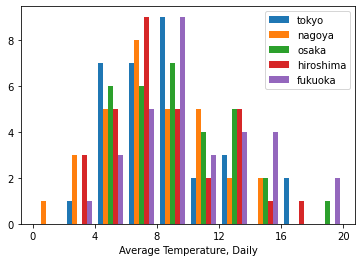

In [85]:
intervals = np.arange(0,22,2) # 0℃から20℃まで2刻みの配列をつくる。
labels = ['tokyo','nagoya','osaka','hiroshima','fukuoka'] #ラベルの定義
plt.hist([tokyo, nagoya,osaka,hiroshima,fukuoka], bins=intervals, label=labels)
# 上の命令は、各データについて、階級（bins）をintervalsで定義されたものとするヒストグラムを描かせるものです。
plt.legend(loc='upper right') #凡例（legend）の位置。labelの定義が必要。
plt.xticks([0,4,8,12,16,20]) # X軸の目盛りの打ち方を指定
plt.xlabel("Average Temperature, Daily")

### 度数分布表

これを度数分布表として表現してみましょう。最初に出力するのは、それぞれの階級(bin)の下限の値です。次からは、都市ごとに、その階級に存在するデータがいくつあるかの集計結果を出力します。たとえば、東京では、0から2℃が0個、2から4℃が1個、4から6℃が7個、...と集計されます。

In [70]:
print(intervals)
for i in range(5):
    print(labels[i])
    hist = np.histogram(temp_data[:,i], bins = intervals)[0]
    print(hist)

[ 0  2  4  6  8 10 12 14 16 18 20]
tokyo
[0 1 7 7 9 2 3 0 2 0]
nagoya
[1 3 5 8 5 5 2 2 0 0]
osaka
[0 0 6 6 7 4 5 2 0 1]
hiroshima
[0 3 5 9 5 2 5 1 1 0]
fukuoka
[0 1 3 5 9 3 4 4 0 2]


上で使うnumpy.histogram()関数は、matplotlib.pyplot.hist()関数でも使われています。単独では次のように２つの要素(どちらも配列)からなる配列を出力します。最初の要素が集計結果で、２つ目の要素は区間の端の値です。

In [71]:
np.histogram(tokyo,bins=intervals)

(array([0, 1, 7, 7, 9, 2, 3, 0, 2, 0], dtype=int64),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20]))

### 箱ひげ図

箱ひげ図を描きましょう。

{'whiskers': [<matplotlib.lines.Line2D at 0x19f84818b80>,
 'caps': [<matplotlib.lines.Line2D at 0x19f8482d220>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f848188b0>,
 'medians': [<matplotlib.lines.Line2D at 0x19f8482d700>,
 'fliers': [<matplotlib.lines.Line2D at 0x19f8482d9d0>,
 'means': []}

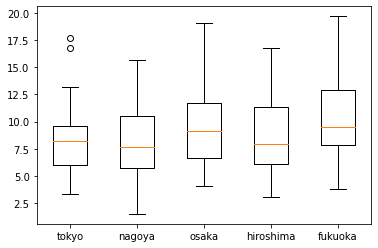

In [72]:
cities = ['tokyo','nagoya','osaka','hiroshima','fukuoka']
plt.boxplot([tokyo, nagoya,osaka,hiroshima,fukuoka],labels=cities)

この箱ひげ図が表すものを説明します。  
まず、箱の部分は第１四分位点の値から第３四分位点までの値（つまり下から25%までの値から、下から75%の値まで）の範囲を表します。箱の内部の横線は平均値を表します。また、箱に入る値の範囲を「四分位範囲」（interquartile rannge, IQR）といいます。 
端に横棒が付いた、箱の上下に突き出した棒は、その端がそれぞれ最大値と最小値を表します。  
ただし、箱ひげ図の描き方のひとつとして、「第１四分位点よりも IQRの長さの1.5倍小さい値」未満、または、「第３四分位点よりも IQRの長さの1.5倍大きい値」を超えるような値を「外れ値」として表示する場合があります。この図では、東京の16.8℃と17.7℃が外れ値となっています。

### 練習問題２

次の表は、２０１７年度のサッカーJリーグ（J２）のチーム年間総得点のデータです（統計検定２級２０１８年６月より）

|チーム名|年間総得点|
|--|--|
|山形|45|
|水戸|45|
|群馬|32|
|千葉|70|
|東京V|64|
|町田|53|
|横浜FC|60|
|湘南|58|
|松本|61|
|金沢|49|
|名古屋|85|
|岐阜|56|
|京都|55|
|岡山|44|
|山口|48|
|讃岐|41|
|徳島|71|
|愛媛|54|
|福岡|54|
|長崎|59|
|熊本|36|
|大分|58|

次の問いに答えてください（統計検定２級２０１８年６月より改題）

（０）平均点と標準偏差を求めてください

In [10]:
import numpy as np
from scipy import stats
scores_j2 = np.array([45,45,32,70,64,53,60,58,61,49,85,56,55,44,48,41,71,54,54,59,36,58])
#平均
mean_j2 = np.mean(scores_j2)
#標準偏差
st_dev_j2 = np.std(scores_j2)
print(mean_j2)
print(st_dev_j2)

54.45454545454545
11.773341507317872


（１）チーム年間総得点ならびに標準化得点（定義は練習問題１で示しました）の分布を箱ひげ図で示してください。

{'whiskers': [<matplotlib.lines.Line2D at 0x18b8c69eee0>,
 'caps': [<matplotlib.lines.Line2D at 0x18b8c6ab4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b8c69ec10>],
 'medians': [<matplotlib.lines.Line2D at 0x18b8c6aba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x18b8c6abd30>],
 'means': []}

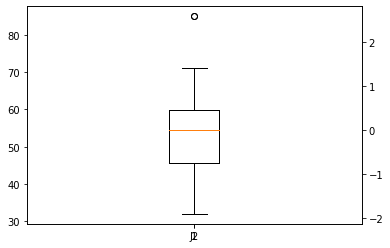

In [11]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
scores_j2 = np.array([45,45,32,70,64,53,60,58,61,49,85,56,55,44,48,41,71,54,54,59,36,58])
teams_j2 = np.array(['yamagata','mito','gumma','chiba','tokyo-v','machida','yokohama-fc','shonan','matsumoto','kanazawa',
            'nagoya','gifu','kyoto','okayama','yamaguchi','sanuki','tokushima','ehiime','fukuoka',
            'nagasaki','kumamoto','oita'])
# 次の関数は標準化得点を定義に従い計算します。
# x: 得点, mean_x: 平均, st_dev_x: 標準偏差
def st_score(x,mean_x, st_dev_x):
    y = (x - mean_x)/st_dev_x
    return y

# 平均
mean_j2 = np.mean(scores_j2)
# 標準偏差
st_dev_j2 = np.sqrt(np.var(scores_j2))
# 標準化得点を計算
# numpy配列に対するブロードキャストで計算が行われていることに注意
st_scores_j2 = st_score(scores_j2,mean_j2,st_dev_j2)


# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）

# 箱ひげ図の表示
ax1.boxplot(scores_j2,labels=['J2'])
ax2.boxplot(st_scores_j2)
# 本質的に同じものなので、見かけ上ひとつしか表示されない。左に総得点、右に標準化得点の軸が表示される。

（２）J2のチーム年間総得点において、平均から標準偏差の２倍以上多く得点したチームはどれですか。

ヒント：
- numpyの配列 > 2 は、配列の各要素が２より大きいかどうかをboolean (True or False)で返します。
- numpy.where()で、配列の要素のうち条件に合う要素（つまりTrueの要素）のインデックス（添字）を取り出すことができます。
- numpy配列に配列を与えると、それをインデックスとする要素の配列を返します

In [12]:
# インポートする命令は上で実行したので省略
# 条件にあてはまるインデックスを取得
index_true = np.where(st_scores_j2 > 2)
# そのインデックスをもつチーム名を取得
teams_j2[index_true]

array(['nagoya'], dtype='<U11')

## 練習問題１の解答例

### 問１

In [26]:
import numpy as np
import scipy as sp
# 1回目, 2回目の試験の点数を
# np.array([点数11, 点数12, ..., 点数1n ], [点数21, 点数2, ..., 点数2n])とします。
test_scores = np.array([[30, 30, 40, 40, 50, 50, 60, 60, 70, 70],
                       [45, 60, 50, 65, 70, 50, 55, 60, 70, 75]])
#np.shape(test_scores) # 行列の形を確認
# 1回目の試験の平均: mu_1, 2回目の試験の平均: mu_2とします。
mu_1 = np.mean(test_scores[0])
mu_2 = np.mean(test_scores[1])
print("1回目の試験の平均:",mu_1)
print("2回目の試験の平均:",mu_2)
#１回目の試験の標準偏差: d_1, 2回目の試験の標準偏差：d_2とします
d_1 = np.sqrt(np.var(test_scores[0],ddof=0))
d_2 = np.sqrt(np.var(test_scores[1],ddof=0))
print("1回目の試験の標準偏差:",d_1)
print("2回目の試験の標準偏差:",d_2)

1回目の試験の平均: 50.0
2回目の試験の平均: 60.0
1回目の試験の標準偏差: 14.142135623730951
2回目の試験の標準偏差: 9.486832980505138


### 問２

In [28]:
# mean_1: 1回目の平均点
# mean_2: ２回目の平均点
# st_dev_1: １回目の（標本）標準偏差
# st_dev_2: ２回目の（標本）標準偏差
mean_1 = np.mean(test_scores[0])
mean_2 = np.mean(test_scores[1])
st_dev_1 = np.sqrt(np.var(test_scores[0]))
st_dev_2 = np.sqrt(np.var(test_scores[1]))
#Cさんの１回目の点
score_C_1 = test_scores[0,2]
#Cさんの２回目の点
score_C_2 = test_scores[1,2]
#Cさんの1回目の標準化得点
z_C_1 = (score_C_1 - mean_1)/st_dev_1
#Cさんの2回目の標準化得点
z_C_2 = (score_C_2 - mean_2)/st_dev_2
#結果出力
print("Cさんの1回目の標準化得点:",z_C_1)
print("Cさんの2回目の標準化得点:",z_C_2)

Cさんの1回目の標準化得点: -0.7071067811865475
Cさんの2回目の標準化得点: -1.0540925533894598


## 練習問題２の解答例

### 問（１）

{'whiskers': [<matplotlib.lines.Line2D at 0x211e1dafa00>,
 'caps': [<matplotlib.lines.Line2D at 0x211e1daffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211e1daf730>],
 'medians': [<matplotlib.lines.Line2D at 0x211e1db9580>],
 'fliers': [<matplotlib.lines.Line2D at 0x211e1db9850>],
 'means': []}

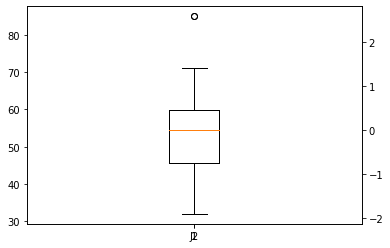

In [55]:
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
scores_j2 = np.array([45,45,32,70,64,53,60,58,61,49,85,56,55,44,48,41,71,54,54,59,36,58])
teams_j2 = np.array(['yamagata','mito','gumma','chiba','tokyo-v','machida','yokohama-fc','shonan','matsumoto','kanazawa',
            'nagoya','gifu','kyoto','okayama','yamaguchi','sanuki','tokushima','ehiime','fukuoka',
            'nagasaki','kumamoto','oita'])
# 次の関数は標準化得点を定義に従い計算します。
# mean_x: 平均, st_dev_x: 標準偏差
def st_score(x,mean_x, st_dev_x):
    y = (x -mean_x)/st_dev_x
    return y

mean_j2 = np.mean(scores_j2)
st_dev_j2 = np.sqrt(np.var(scores_j2))
st_scores_j2 = st_score(scores_j2,mean_j2,st_dev_j2)


# figureインスタンスを作る
fig = plt.figure()
# Y軸を2つ作る。
ax1 = fig.subplots() # 1つめのY軸（左側）
ax2 = ax1.twinx() # 2つめのY軸　（右側）

# 箱ひげ図の表示
ax1.boxplot(scores_j2,labels=['J2'])
ax2.boxplot(st_scores_j2)

### 問（２）

In [56]:
index_true = np.where(st_scores_j2 > 2)
teams_j2[index_true]

array(['nagoya'], dtype='<U11')